In [2]:

import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle # this function has to be in the same directory!
# pip install finta!!! the only site that has inverse fisher transform!


In [10]:
symbol ="AMD"

ticker = yfinance.Ticker(symbol)
df=ticker.history(interval='1d',start="2019-01-01",end="2021-02-05")

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-31,18.150000,18.510000,17.850000,18.459999,84732200,0,0
2019-01-02,18.010000,19.000000,17.980000,18.830000,87148700,0,0
2019-01-03,18.420000,18.680000,16.940001,17.049999,117277600,0,0
2019-01-04,17.549999,19.070000,17.430000,19.000000,111878600,0,0
2019-01-07,19.440001,20.680000,19.000000,20.570000,107157000,0,0
...,...,...,...,...,...,...,...
2021-01-29,87.559998,88.330002,85.019997,85.639999,56631200,0,0
2021-02-01,86.830002,87.949997,84.660004,87.660004,42359300,0,0
2021-02-02,88.489998,89.279999,86.949997,88.860001,33850000,0,0


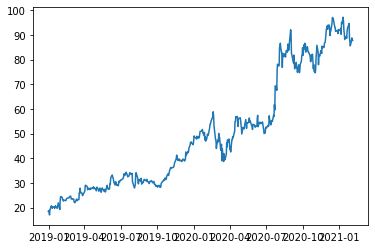

In [11]:

df = df[['Close']]
df.reset_index(level=0, inplace=True)
df.columns=['ds','y']
plt.plot(df.ds, df.y, label='AMD')

plt.show()

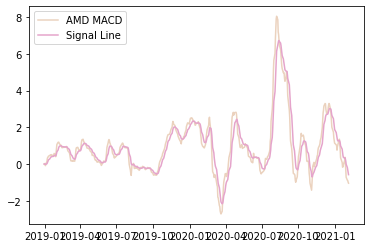

In [12]:
exp1 = df.y.ewm(span=12, adjust=False).mean()
exp2 = df.y.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.plot(df.ds, macd, label='AMD MACD', color = '#EBD2BE')
plt.plot(df.ds, exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()